## Regression using Keras - KC Housing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [3]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  int64  
 17  lat            21611 non-null  float64
 18  long  

### Plotting

C:\Users\subha\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


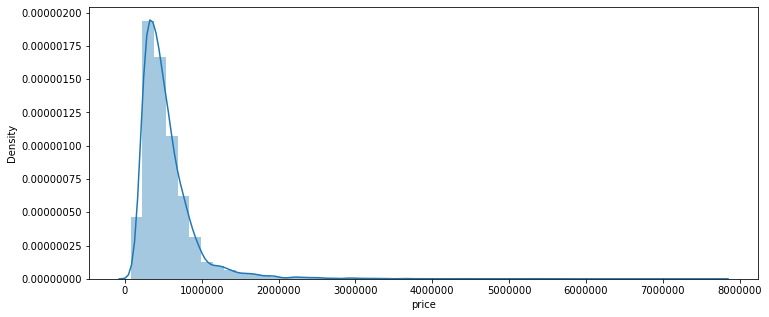

In [61]:
plt.figure(figsize=(12,5))
sns.distplot(df["price"])
plt.show()

C:\Users\subha\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


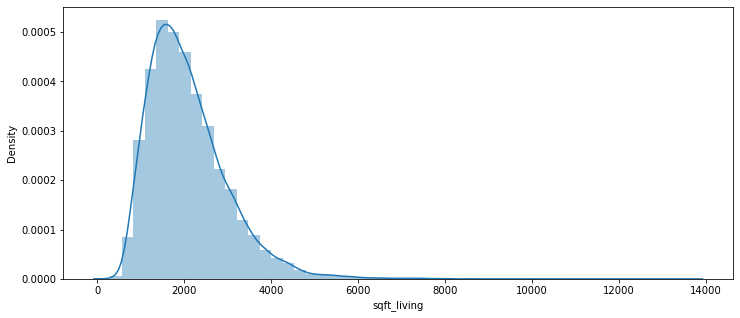

In [78]:
plt.figure(figsize=(12,5))
sns.distplot(df["sqft_living"])
plt.show()

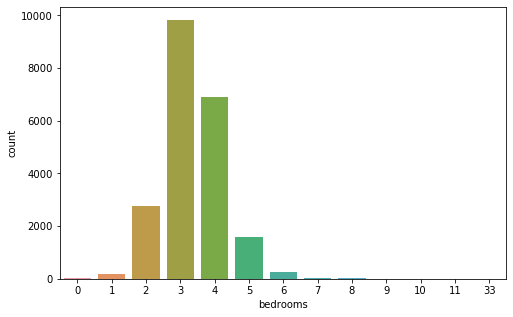

In [65]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="bedrooms")
plt.show()

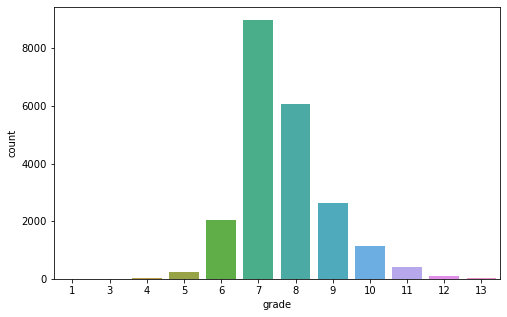

In [82]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="grade")
plt.show()

In [77]:
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

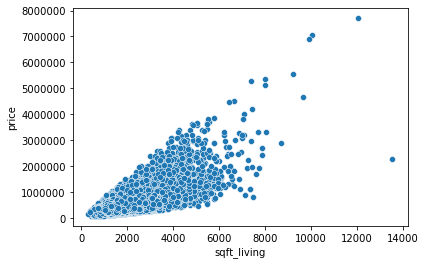

In [83]:
sns.scatterplot(data=df, y="price", x="sqft_living")
plt.show()

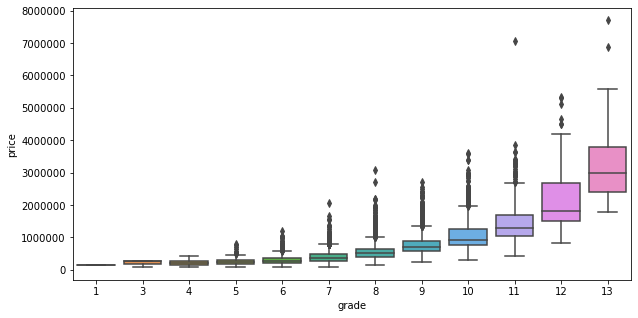

In [87]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y="price", x="grade")
plt.show()

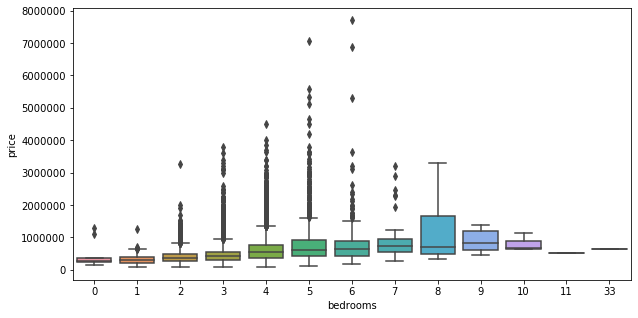

In [90]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y="price", x="bedrooms")
plt.show()

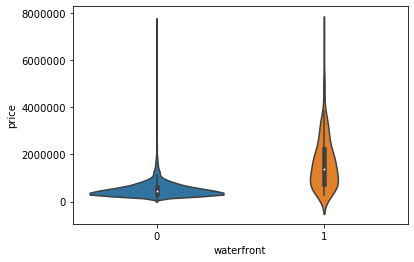

In [110]:
sns.violinplot(data=df, y="price", x="waterfront")
plt.show()

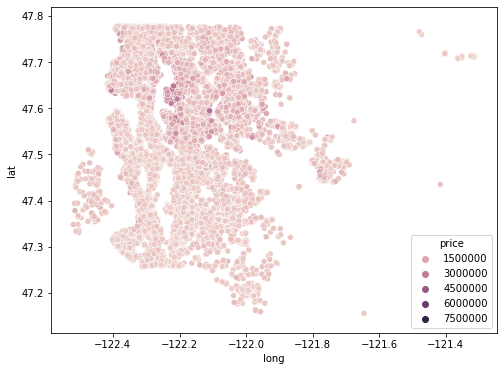

In [95]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="long",y="lat", hue="price")

### Removing outliers

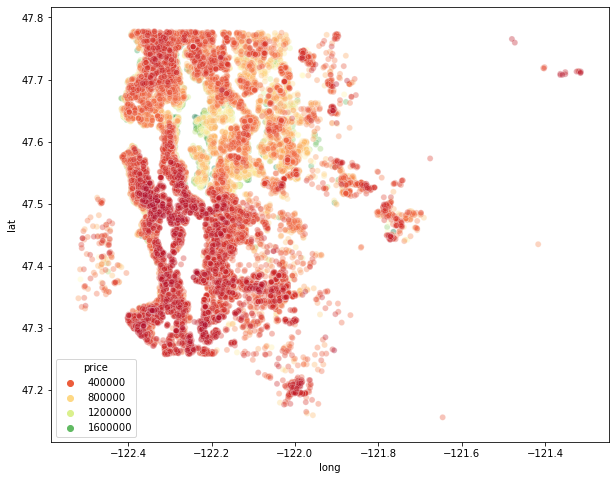

In [108]:
top1p = int(len(df)*0.01)
top1p
newdf = df.sort_values("price", ascending=False).iloc[top1p:]

plt.figure(figsize=(10,8))
sns.scatterplot(data=newdf, x="long",y="lat",
                hue="price",alpha=0.35, palette="RdYlGn")
plt.show()

In [6]:
df = df.drop('id', axis=1)
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].apply(lambda date: date.year)
df["month"] = df["date"].apply(lambda date: date.month)
df = df.drop("date", axis=1)
df = df.drop("zipcode", axis=1)

In [7]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,47.6168,-122.045,1800,7503,2015,2


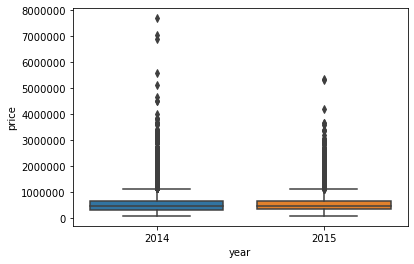

In [121]:
sns.boxplot(data=df, y="price", x="year")
plt.show()

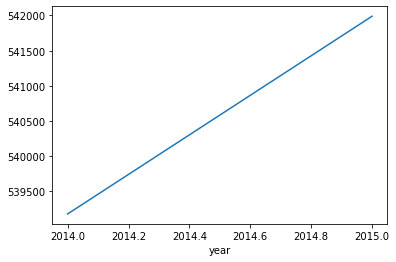

In [127]:
df.groupby("year").mean()["price"].plot()
plt.show()

In [131]:
df["yr_renovated"].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

#   

## Data Pre-processing

### Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop("price", axis=1).values
y = df["price"].values

X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Scaling data

In [10]:
from sklearn.preprocessing import MaxAbsScaler

In [11]:
scaler = MaxAbsScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#   

## DL Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()

model.add(Dense(19, activation="relu"))
model.add(Dense(19, activation="relu"))
model.add(Dense(19, activation="relu"))
model.add(Dense(19, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

## Training

In [17]:
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test, y_test),
          batch_size=128, epochs=150)

Train on 15127 samples, validate on 6484 samples
Epoch 1/150
15127/15127 [==============================] - 1s 51us/sample - loss: 426877980239.0322 - val_loss: 425371020566.5836
Epoch 2/150
15127/15127 [==============================] - 0s 21us/sample - loss: 425225449982.9507 - val_loss: 419770387830.6033
Epoch 3/150
15127/15127 [==============================] - 0s 21us/sample - loss: 404793797060.3282 - val_loss: 374131453277.3350
Epoch 4/150
15127/15127 [==============================] - 0s 20us/sample - loss: 315708561864.3898 - val_loss: 237320205250.7242
Epoch 5/150
15127/15127 [==============================] - 0s 20us/sample - loss: 170264989089.7368 - val_loss: 121171092279.7483
Epoch 6/150
15127/15127 [==============================] - 0s 20us/sample - loss: 116135421186.3862 - val_loss: 111221222486.5441
Epoch 7/150
15127/15127 [==============================] - 0s 21us/sample - loss: 113429356825.6051 - val_loss: 110078383775.5065
Epoch 8/150
15127/15127 [================

Epoch 64/150
15127/15127 [==============================] - 0s 18us/sample - loss: 52969571329.4216 - val_loss: 53134971807.3485
Epoch 65/150
15127/15127 [==============================] - 0s 20us/sample - loss: 52693021896.1698 - val_loss: 52813087467.9432
Epoch 66/150
15127/15127 [==============================] - 0s 20us/sample - loss: 52487946379.4487 - val_loss: 52573158393.0512
Epoch 67/150
15127/15127 [==============================] - 0s 18us/sample - loss: 52124504661.0569 - val_loss: 52297837634.3294
Epoch 68/150
15127/15127 [==============================] - 0s 20us/sample - loss: 51867007861.8375 - val_loss: 52034251508.7872
Epoch 69/150
15127/15127 [==============================] - 0s 20us/sample - loss: 51543265450.3169 - val_loss: 51795935429.0932
Epoch 70/150
15127/15127 [==============================] - 0s 18us/sample - loss: 51260194990.9201 - val_loss: 51548309063.0672
Epoch 71/150
15127/15127 [==============================] - 0s 19us/sample - loss: 50993525545.88

15127/15127 [==============================] - 0s 18us/sample - loss: 45260680642.6358 - val_loss: 46552980346.7094
Epoch 128/150
15127/15127 [==============================] - 0s 18us/sample - loss: 45259916017.6997 - val_loss: 46535365216.9673
Epoch 129/150
15127/15127 [==============================] - 0s 18us/sample - loss: 45167027307.2942 - val_loss: 46495998528.1184
Epoch 130/150
15127/15127 [==============================] - 0s 18us/sample - loss: 45111929449.5004 - val_loss: 46429141847.3337
Epoch 131/150
15127/15127 [==============================] - 0s 18us/sample - loss: 45063861598.7202 - val_loss: 46512838960.4837
Epoch 132/150
15127/15127 [==============================] - 0s 18us/sample - loss: 45024237352.1253 - val_loss: 46349138785.4411
Epoch 133/150
15127/15127 [==============================] - 0s 19us/sample - loss: 44969906401.8256 - val_loss: 46267503852.8908
Epoch 134/150
15127/15127 [==============================] - 0s 18us/sample - loss: 44956306560.5500 - v

### Model Evaluation

In [24]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,4.268810e+11,4.254040e+11
1,4.258905e+11,4.221359e+11
2,4.138258e+11,3.948136e+11
3,3.563682e+11,2.991260e+11
4,2.301260e+11,1.600523e+11


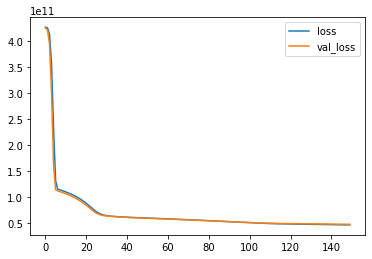

In [25]:
losses.plot()

### Adding dropout layers & early stopping

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()


model.add(Dense(19, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(19, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(19, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(loss="mse", optimizer="adam")

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=25,verbose=1)

model.fit(x=X_train, y=y_train, 
          epochs=400, batch_size=128,
          validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 15127 samples, validate on 6484 samples
Epoch 1/400
15127/15127 [==============================] - 1s 54us/sample - loss: 426887218365.0681 - val_loss: 425446416237.4435
Epoch 2/400
15127/15127 [==============================] - 0s 21us/sample - loss: 426505792285.8359 - val_loss: 424350476185.6631
Epoch 3/400
15127/15127 [==============================] - 0s 22us/sample - loss: 423473665671.4886 - val_loss: 418307470153.4362
Epoch 4/400
15127/15127 [==============================] - 0s 21us/sample - loss: 412128939536.2126 - val_loss: 400105388715.5090
Epoch 5/400
15127/15127 [==============================] - 0s 23us/sample - loss: 384968633796.9374 - val_loss: 362570803744.5330
Epoch 6/400
15127/15127 [==============================] - 0s 21us/sample - loss: 338779055511.3120 - val_loss: 304221099244.8908
Epoch 7/400
15127/15127 [==============================] - 0s 21us/sample - loss: 278927961349.2294 - val_loss: 235782546777.5447
Epoch 8/400
15127/15127 [================

15127/15127 [==============================] - 0s 20us/sample - loss: 134778603059.0071 - val_loss: 81460505241.8211
Epoch 64/400
15127/15127 [==============================] - 0s 20us/sample - loss: 138211172099.0970 - val_loss: 80869405240.5379
Epoch 65/400
15127/15127 [==============================] - 0s 20us/sample - loss: 132376201854.0792 - val_loss: 79786665709.8384
Epoch 66/400
15127/15127 [==============================] - 0s 20us/sample - loss: 132124641714.9986 - val_loss: 80435136263.1067
Epoch 67/400
15127/15127 [==============================] - 0s 20us/sample - loss: 132556979716.5693 - val_loss: 80217373072.5034
Epoch 68/400
15127/15127 [==============================] - 0s 20us/sample - loss: 130560907765.3383 - val_loss: 78784147155.3066
Epoch 69/400
15127/15127 [==============================] - 0s 20us/sample - loss: 130092655200.7002 - val_loss: 78080567102.6971
Epoch 70/400
15127/15127 [==============================] - 0s 21us/sample - loss: 130689277347.6322 - 

Epoch 126/400
15127/15127 [==============================] - 0s 21us/sample - loss: 122713912595.9865 - val_loss: 70229721916.8020
Epoch 127/400
15127/15127 [==============================] - 0s 21us/sample - loss: 126633795194.3560 - val_loss: 71693203816.0740
Epoch 128/400
15127/15127 [==============================] - 0s 21us/sample - loss: 123807702090.6660 - val_loss: 70816685023.7829
Epoch 129/400
15127/15127 [==============================] - 0s 21us/sample - loss: 125176875027.0896 - val_loss: 70192478002.0629
Epoch 130/400
15127/15127 [==============================] - 0s 21us/sample - loss: 122737553984.4781 - val_loss: 70807217719.9062
Epoch 131/400
15127/15127 [==============================] - 0s 21us/sample - loss: 119952009393.2216 - val_loss: 70603989189.0932
Epoch 132/400
15127/15127 [==============================] - 0s 21us/sample - loss: 121759022070.1844 - val_loss: 69941242440.9624
Epoch 133/400
15127/15127 [==============================] - 0s 21us/sample - loss:

15127/15127 [==============================] - 0s 20us/sample - loss: 119302050624.6304 - val_loss: 68167515129.0512
Epoch 189/400
15127/15127 [==============================] - 0s 20us/sample - loss: 119803859704.6045 - val_loss: 68267845772.2394
Epoch 190/400
15127/15127 [==============================] - 0s 20us/sample - loss: 122375205133.9618 - val_loss: 68715633581.2461
Epoch 191/400
15127/15127 [==============================] - 0s 20us/sample - loss: 119538682805.4694 - val_loss: 68302503551.9210
Epoch 192/400
15127/15127 [==============================] - 0s 20us/sample - loss: 118201590196.4879 - val_loss: 67741920979.3066
Epoch 193/400
15127/15127 [==============================] - 0s 20us/sample - loss: 120118187634.9098 - val_loss: 65552139745.9938
Epoch 194/400
15127/15127 [==============================] - 0s 20us/sample - loss: 119489740223.7927 - val_loss: 67637285558.8797
Epoch 195/400
15127/15127 [==============================] - 0s 20us/sample - loss: 117288199644.

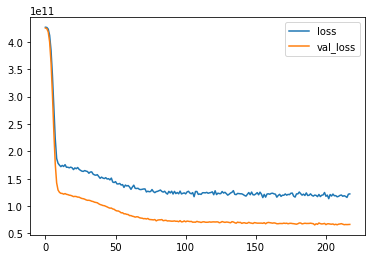

In [34]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)
print("Root Mean Square Error",np.sqrt(mean_squared_error(y_test,predictions)))
print("Mean price of house",df["price"].mean())

Root Mean Square Error 252907.90573467093
Mean price of house 540085.0265142751


In [32]:
print("Explained Variance ",explained_variance_score(y_test,predictions))

Explained Variance  0.584100696928433


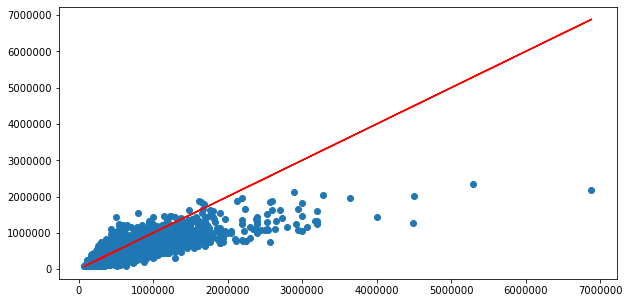

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test,"r")
plt.show()